In [16]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Setup
%matplotlib inline
sns.set(style="darkgrid")

In [18]:
# Cell 2: Load datasets from Johns Hopkins GitHub (use raw CSVs for global confirmed, deaths, recovered)
confirmed = pd.read_csv("time_series_covid19_confirmed_global.csv")
deaths = pd.read_csv("time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("time_series_covid19_recovered_global.csv")

# Show samples
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [32]:
def preprocess(df):
    # Drop non-date columns before transposing
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1, errors='ignore')
    df = df.groupby('Country/Region').sum()
    df = df.T
    df.index = pd.to_datetime(df.index, errors='coerce')  # safely parse dates
    df = df[df.index.notnull()]  # drop rows where index couldn't be parsed to date
    df.fillna(0, inplace=True)
    return df

In [34]:
confirmed_ts = preprocess(confirmed)
deaths_ts = preprocess(deaths)
recovered_ts = preprocess(recovered)

C:\Users\anush\AppData\Local\Temp\ipykernel_6260\3601716264.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index)  # safely parse dates
C:\Users\anush\AppData\Local\Temp\ipykernel_6260\3601716264.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index)  # safely parse dates
C:\Users\anush\AppData\Local\Temp\ipykernel_6260\3601716264.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index)  # safely parse dates


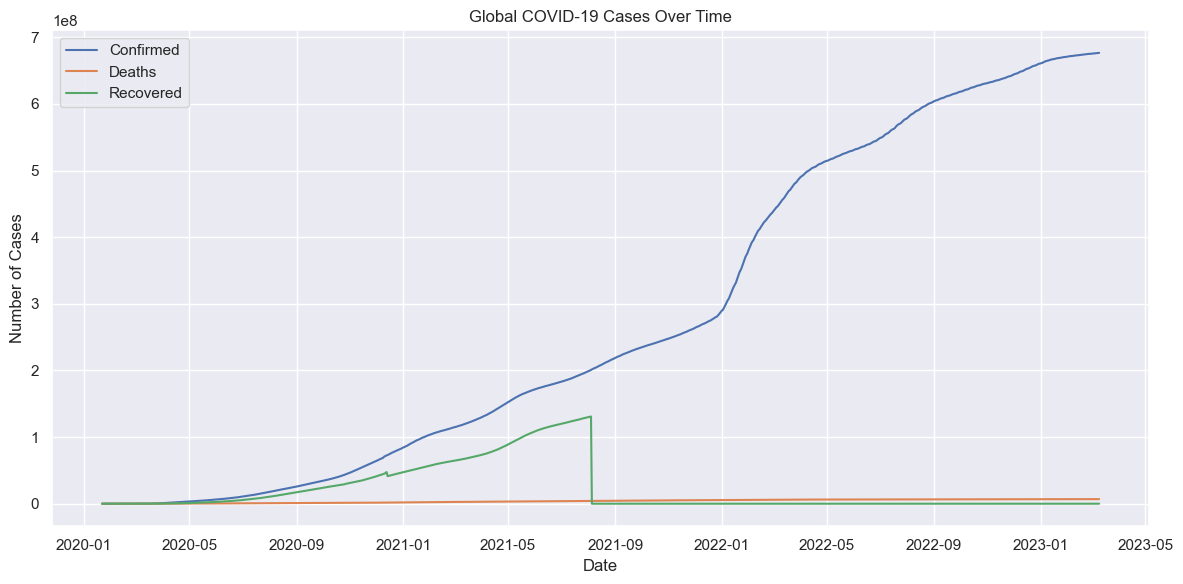

In [24]:
# Cell 4: Plot global trends over time
plt.figure(figsize=(12,6))
plt.plot(confirmed_ts.sum(axis=1), label="Confirmed")
plt.plot(deaths_ts.sum(axis=1), label="Deaths")
plt.plot(recovered_ts.sum(axis=1), label="Recovered")
plt.title("Global COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.tight_layout()
plt.show()

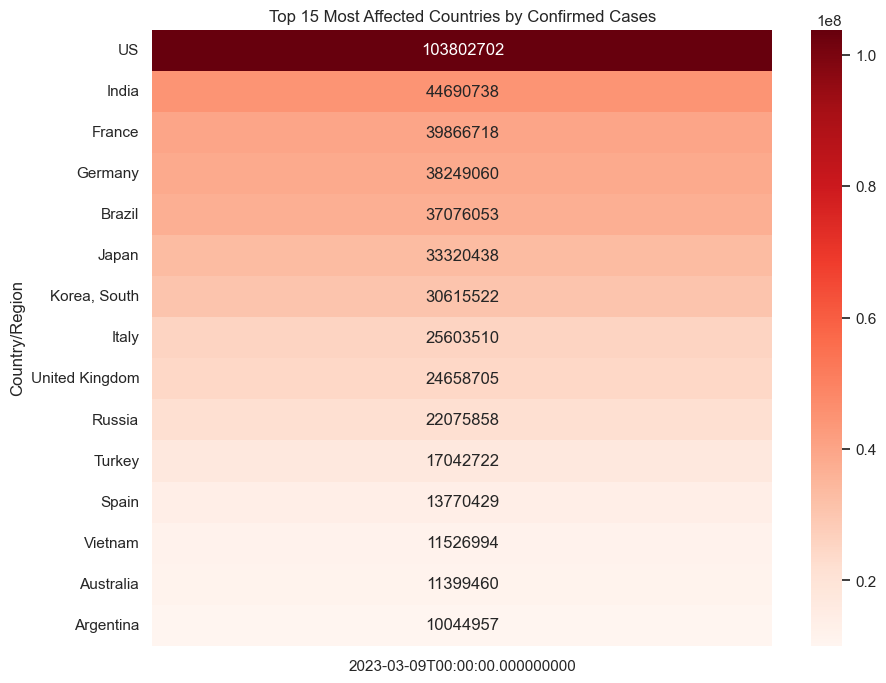

In [26]:
# Cell 5: Heatmap of most affected countries on latest date
latest_confirmed = confirmed_ts.iloc[-1]
top_countries = latest_confirmed.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(top_countries), annot=True, fmt=".0f", cmap="Reds")
plt.title("Top 15 Most Affected Countries by Confirmed Cases")
plt.show()

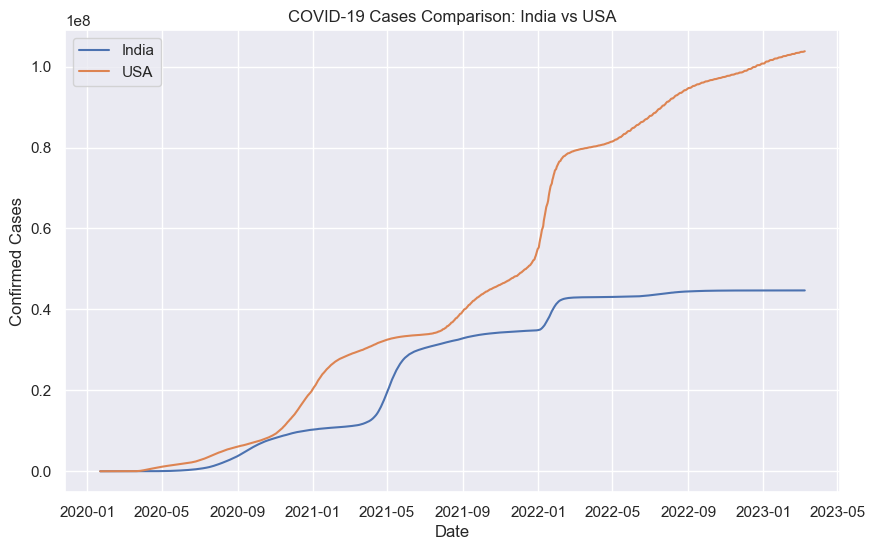

In [36]:
# Cell 6: Regional trend - Example: India vs USA
plt.figure(figsize=(10,6))
plt.plot(confirmed_ts["India"], label="India")
plt.plot(confirmed_ts["US"], label="USA")
plt.title("COVID-19 Cases Comparison: India vs USA")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.show()

In [38]:
# Cell 7: Feature Focus - Add population density and testing rate (requires external datasets)
# Placeholder dataframe (manually input or use proper data source like World Bank or Our World in Data)
population_density = {
    'India': 464, 'US': 36, 'Brazil': 25, 'Russia': 9, 'France': 119
}
testing_rate = {
    'India': 370000, 'US': 700000, 'Brazil': 450000, 'Russia': 350000, 'France': 300000
}

# Combine into a DataFrame
feature_df = pd.DataFrame({
    'Population Density': population_density,
    'Testing Rate (per day)': testing_rate,
    'Confirmed Cases': confirmed_ts.iloc[-1][list(population_density.keys())]
})
feature_df.sort_values("Confirmed Cases", ascending=False)

,Population Density,Testing Rate (per day),Confirmed Cases
US,36,700000,103802702
India,464,370000,44690738
France,119,300000,39866718
Brazil,25,450000,37076053
Russia,9,350000,22075858


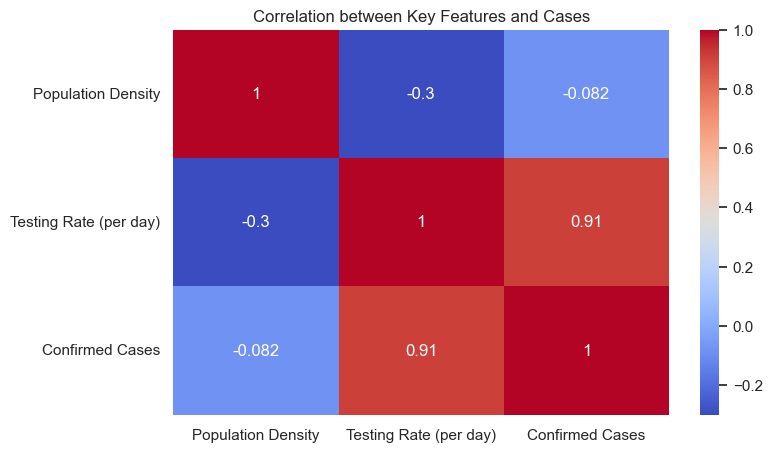

In [40]:
# Cell 8: Correlation heatmap between features
plt.figure(figsize=(8,5))
sns.heatmap(feature_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Key Features and Cases")
plt.show()

In [42]:
# Cell 9: Conclusion cell (markdown in notebook)

"""
### Conclusion

- The global infection trend shows exponential growth until mid-2020, followed by periodic waves.
- The US and India show drastically different timelines despite high case volumes.
- High population density and lower testing rates correlate with delayed detection and underreporting.
- More testing and timely data collection lead to better pandemic response strategies.
- Governments must invest in accessible health infrastructure and real-time monitoring to combat future outbreaks.
"""

'\n### Conclusion\n\n- The global infection trend shows exponential growth until mid-2020, followed by periodic waves.\n- The US and India show drastically different timelines despite high case volumes.\n- High population density and lower testing rates correlate with delayed detection and underreporting.\n- More testing and timely data collection lead to better pandemic response strategies.\n- Governments must invest in accessible health infrastructure and real-time monitoring to combat future outbreaks.\n'